PRE-PROCESSING

In [ ]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import datetime
import plotly.express as px

In [ ]:
df=pd.read_csv("https://raw.githubusercontent.com/kedarvoggu/customer/main/Comcast_telecom_complaints_data.csv")
dfv=df

In [ ]:
df

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No
...,...,...,...,...,...,...,...,...,...,...,...
2219,213550,Service Availability,04-02-15,04-Feb-15,9:13:18 AM,Customer Care Call,Youngstown,Florida,32466,Closed,No
2220,318775,Comcast Monthly Billing for Returned Modem,06-02-15,06-Feb-15,1:24:39 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No
2221,331188,complaint about comcast,06-09-15,06-Sep-15,5:28:41 PM,Internet,Ypsilanti,Michigan,48197,Solved,No
2222,360489,Extremely unsatisfied Comcast customer,23-06-15,23-Jun-15,11:13:30 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No


In [ ]:
df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [ ]:
df.tail()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
2219,213550,Service Availability,04-02-15,04-Feb-15,9:13:18 AM,Customer Care Call,Youngstown,Florida,32466,Closed,No
2220,318775,Comcast Monthly Billing for Returned Modem,06-02-15,06-Feb-15,1:24:39 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No
2221,331188,complaint about comcast,06-09-15,06-Sep-15,5:28:41 PM,Internet,Ypsilanti,Michigan,48197,Solved,No
2222,360489,Extremely unsatisfied Comcast customer,23-06-15,23-Jun-15,11:13:30 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No
2223,363614,"Comcast, Ypsilanti MI Internet Speed",24-06-15,24-Jun-15,10:28:33 PM,Customer Care Call,Ypsilanti,Michigan,48198,Open,Yes


In [ ]:
#To see all column names
print(list(df.columns))

['Ticket #', 'Customer Complaint', 'Date', 'Date_month_year', 'Time', 'Received Via', 'City', 'State', 'Zip code', 'Status', 'Filing on Behalf of Someone']


In [ ]:
df.dtypes

Ticket #                       object
Customer Complaint             object
Date                           object
Date_month_year                object
Time                           object
Received Via                   object
City                           object
State                          object
Zip code                        int64
Status                         object
Filing on Behalf of Someone    object
dtype: object

In [ ]:
#Information about columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Ticket #                     2224 non-null   object
 1   Customer Complaint           2224 non-null   object
 2   Date                         2224 non-null   object
 3   Date_month_year              2224 non-null   object
 4   Time                         2224 non-null   object
 5   Received Via                 2224 non-null   object
 6   City                         2224 non-null   object
 7   State                        2224 non-null   object
 8   Zip code                     2224 non-null   int64 
 9   Status                       2224 non-null   object
 10  Filing on Behalf of Someone  2224 non-null   object
dtypes: int64(1), object(10)
memory usage: 191.2+ KB


In [ ]:
#Converting Date and Date_month_year column from object to datetime64 dtype
df['Date_month_year'] = pd.to_datetime(df['Date_month_year'])
df['Date'] = pd.to_datetime(df['Date'],format='%d-%m-%y')
df.dtypes

Ticket #                               object
Customer Complaint                     object
Date                           datetime64[ns]
Date_month_year                datetime64[ns]
Time                                   object
Received Via                           object
City                                   object
State                                  object
Zip code                                int64
Status                                 object
Filing on Behalf of Someone            object
dtype: object

In [ ]:
df.describe()

,Zip code
count,2224.000000
mean,47994.393435
std,28885.279427
min,1075.000000
25%,30056.500000
50%,37211.000000
75%,77058.750000
max,99223.000000


In [ ]:
df.iloc[-1]

Ticket #                                                     363614
Customer Complaint             Comcast, Ypsilanti MI Internet Speed
Date                                            2015-06-24 00:00:00
Date_month_year                                 2015-06-24 00:00:00
Time                                                    10:28:33 PM
Received Via                                     Customer Care Call
City                                                      Ypsilanti
State                                                      Michigan
Zip code                                                      48198
Status                                                         Open
Filing on Behalf of Someone                                     Yes
Name: 2223, dtype: object

In [ ]:
df.iloc[:,0]

0       250635
1       223441
2       242732
3       277946
4       307175
         ...  
2219    213550
2220    318775
2221    331188
2222    360489
2223    363614
Name: Ticket #, Length: 2224, dtype: object

In [ ]:
df.iloc[0,3]

Timestamp('2015-04-22 00:00:00')

In [ ]:
df.iloc[0:10,0:2]

,Ticket #,Customer Complaint
0,250635,Comcast Cable Internet Speeds
1,223441,Payment disappear - service got disconnected
2,242732,Speed and Service
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...
4,307175,Comcast not working and no service to boot
5,338519,ISP Charging for arbitrary data limits with ov...
6,361148,Throttling service and unreasonable data caps
7,359792,Comcast refuses to help troubleshoot and corre...
8,318072,Comcast extended outages
9,371214,Comcast Raising Prices and Not Being Available...


In [ ]:
df.iloc[[0,5,10],[0,1,2]]

,Ticket #,Customer Complaint,Date
0,250635,Comcast Cable Internet Speeds,2015-04-22
5,338519,ISP Charging for arbitrary data limits with ov...,2015-12-06
10,255938,Billing after service was asked to be disconne...,2015-04-24


UNIQUE VALUES IN EACH COLUMN

In [ ]:
dict = {}
for i in list(df.columns):
    dict[i] = df[i].value_counts().shape[0]

pd.DataFrame(dict,index=["unique count"]).transpose()

,unique count
Ticket #,2224
Customer Complaint,1841
Date,91
Date_month_year,91
Time,2190
Received Via,2
City,928
State,43
Zip code,1543
Status,4


In [ ]:
df.isnull()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
2219,False,False,False,False,False,False,False,False,False,False,False
2220,False,False,False,False,False,False,False,False,False,False,False
2221,False,False,False,False,False,False,False,False,False,False,False
2222,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

Ticket #                       0
Customer Complaint             0
Date                           0
Date_month_year                0
Time                           0
Received Via                   0
City                           0
State                          0
Zip code                       0
Status                         0
Filing on Behalf of Someone    0
dtype: int64

In [ ]:
df.isnull().sum().sum()

0

No duplicate rows are Present.

Data Cleaning

In [ ]:
df.isnull()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
2219,False,False,False,False,False,False,False,False,False,False,False
2220,False,False,False,False,False,False,False,False,False,False,False
2221,False,False,False,False,False,False,False,False,False,False,False
2222,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

Ticket #                       0
Customer Complaint             0
Date                           0
Date_month_year                0
Time                           0
Received Via                   0
City                           0
State                          0
Zip code                       0
Status                         0
Filing on Behalf of Someone    0
dtype: int64

No missing values in the data set.

In [ ]:
# Removing Duplicates
# Return boolean Series denoting duplicate rows.
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2219    False
2220    False
2221    False
2222    False
2223    False
Length: 2224, dtype: bool

In [ ]:
df.duplicated().sum()

0

No duplicate rows are Present

Data is clean

EDA

In [ ]:
#To get Customer status count
df['Status'].value_counts()

Solved     973
Closed     734
Open       363
Pending    154
Name: Status, dtype: int64

In [ ]:
#Top 5 state has the maximum complaints
df.groupby("State")['Customer Complaint'].agg("count").sort_values(ascending=False).head(5)

State
Georgia       288
Florida       240
California    220
Illinois      164
Tennessee     143
Name: Customer Complaint, dtype: int64

In [ ]:
# number of complaints at Different Months
complaints_months=pd.DataFrame(df.groupby(pd.to_datetime(df['Date_month_year']).dt.month_name())['Customer Complaint'].count())
complaints_months.rename(columns = {'Customer Complaint':'No of Complaints'}, inplace = True)
complaints_months.index.name = 'Month'
complaints_months

,No of Complaints
Month,
April,375
August,67
December,65
February,59
January,55
July,49
June,1046
March,45
May,317


In [ ]:
# number of complaints at Differenet Days in a month
complaints_days=pd.DataFrame(df.groupby(pd.to_datetime(df['Date_month_year']).dt.day)['Customer Complaint'].count())
complaints_days.rename(columns = {'Customer Complaint':'No of Complaints'}, inplace = True)
complaints_days.index.name = 'Date'
complaints_days

,No of Complaints
Date,
4,206
5,131
6,272
13,68
14,54
15,58
16,65
17,60
18,69


FEATURE ENGINEERING

In [ ]:
#Dropping the specific city string value

df = df.loc[df['City'] != 'Attalla']
df = df.loc[df['City'] != 'Chicago']

In [ ]:
#Category Encoding
df['City'] = df['City'].astype('category').cat.codes
df['State'] = df['State'].astype('category').cat.codes
df['Status'] = df['Status'].astype('category').cat.codes
df['Zip code'] = df['Zip code'].astype('category').cat.codes
df['Received Via'] = df['Received Via'].astype('category').cat.codes


In [ ]:
X = df.loc[:,['City', 'State', 'Zip code', 'Status']]
Y= df.loc[:, df.columns == 'Received Via' ]

In [ ]:
categorical_var = ['Received Via', 'City', 'State', 'Zip code', 'Status']
df[categorical_var] = df[categorical_var].astype('category')

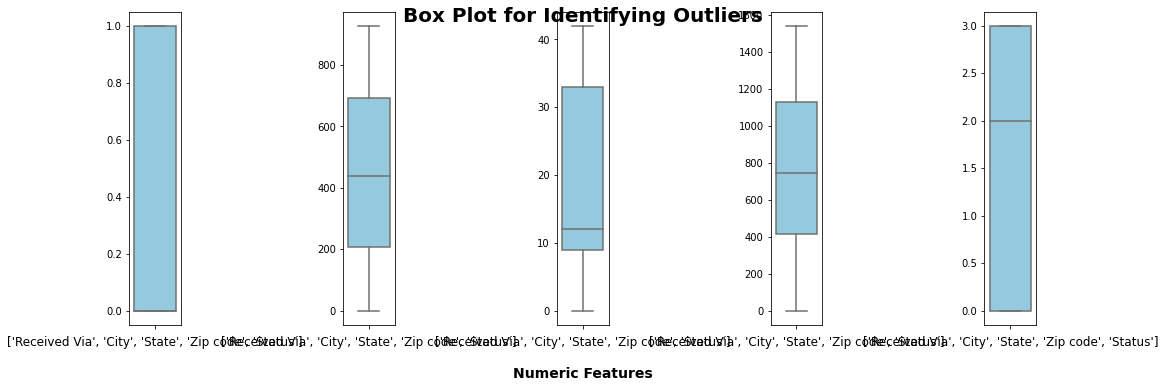

In [ ]:
fig, ax = plt.subplots(1,5, figsize = (15,5))
for axis, cat_var in zip(ax, categorical_var):
    sns.boxplot(y = cat_var,data = df, ax = axis, color = 'skyblue')
    axis.set_xlabel(f"{categorical_var}", fontsize = 12)
    axis.set_ylabel(None)
fig.suptitle('Box Plot for Identifying Outliers', fontsize = 20, weight = 'bold')
fig.text(0.5, -0.05, 'Numeric Features', ha = 'center', fontsize = 14, weight = 'bold')
plt.tight_layout()

There are no outliers among the features. So keeping all the features.

------------------------------------------------------------------------------------------------------------------------------------------------------
              Received Via      City     State  Zip code    Status
Received Via      1.000000 -0.007060 -0.016671  0.003320  0.032927
City             -0.007060  1.000000 -0.012728  0.117201 -0.014528
State            -0.016671 -0.012728  1.000000 -0.089508 -0.017691
Zip code          0.003320  0.117201 -0.089508  1.000000  0.001667
Status            0.032927 -0.014528 -0.017691  0.001667  1.000000


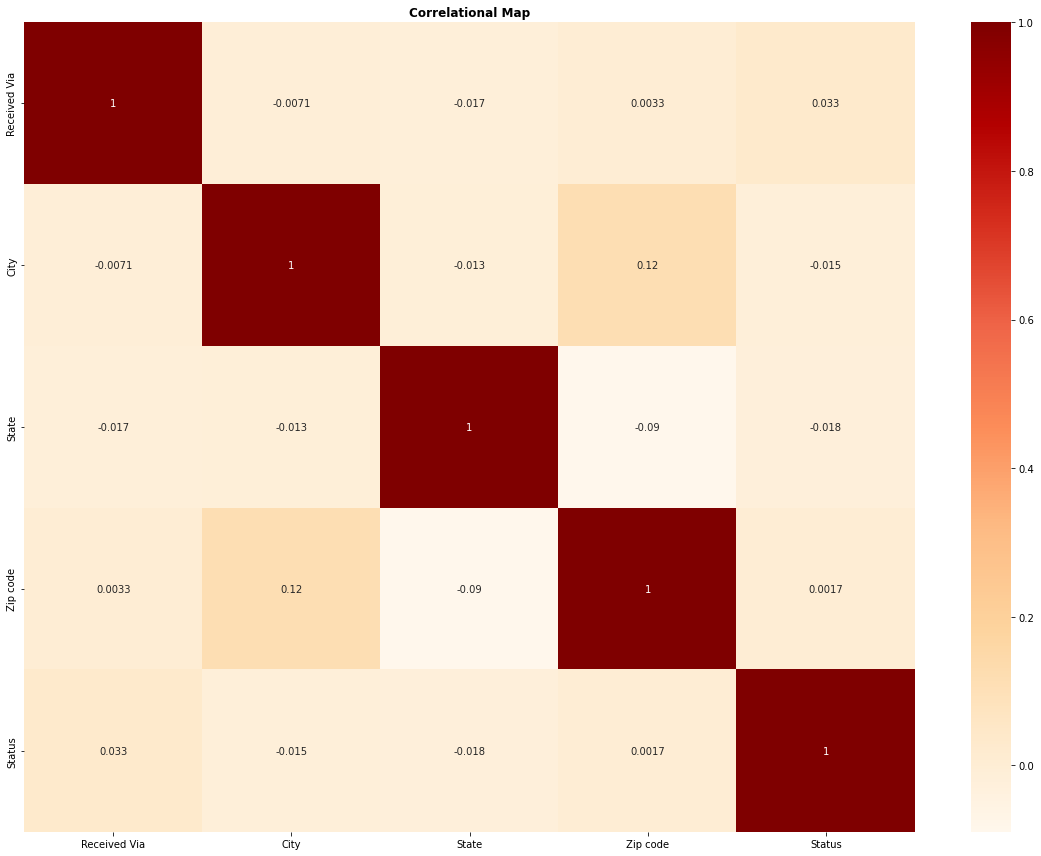

In [ ]:
def find_correlational_map(data):
    plt.figure(figsize=(16,12))
    sns.heatmap(data.corr(), annot=True, cmap='OrRd')
    plt.title('Correlational Map', weight='bold')
    print('---'*50)
    print(data.corr())
    plt.tight_layout()

find_correlational_map(df)

Visualization

In [ ]:
#Converting Date and Date_month_year column from object to datetime64 dtype
dfv['Date_month_year'] = pd.to_datetime(dfv['Date_month_year'])
dfv['Date'] = pd.to_datetime(dfv['Date'],format='%d-%m-%y')
dfv.dtypes

Ticket #                               object
Customer Complaint                     object
Date                           datetime64[ns]
Date_month_year                datetime64[ns]
Time                                   object
Received Via                           object
City                                   object
State                                  object
Zip code                                int64
Status                                 object
Filing on Behalf of Someone            object
Month                                  object
Day                                     int64
dtype: object

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



TypeError: ignored

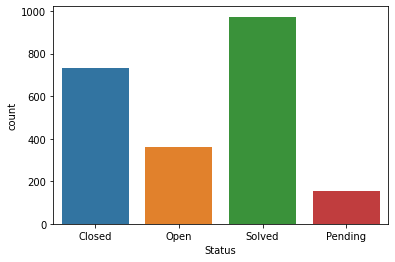

In [ ]:
sns.countplot(dfv['Status'])(dfv["Date_month_year"]).value_counts().plot()

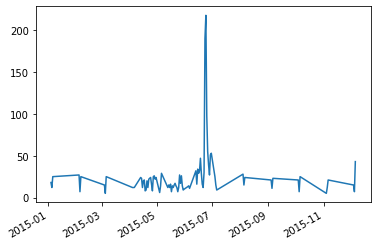

In [ ]:
dfv["Date_month_year"].value_counts().plot()

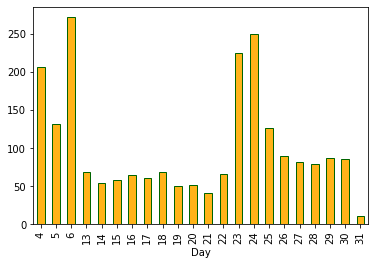

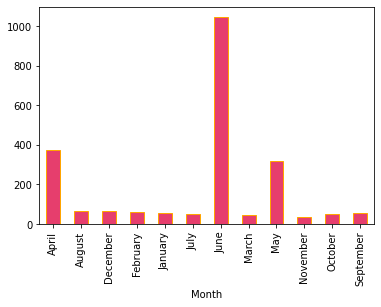

In [ ]:
## - Provide the trend chart for the number of complaints at monthly and daily granularity levels.

dfv['Month']=pd.to_datetime(dfv['Date_month_year']).dt.month_name()
dfv['Day']=pd.to_datetime(dfv['Date_month_year']).dt.day

## Graph for date wise
dfv.groupby(['Day'])['Customer Complaint'].count().plot(kind='bar',color="#FFB319",edgecolor="darkgreen",)
plt.show()
print("\n")

## Graph for month wise
dfv.groupby(['Month'])['Customer Complaint'].count().plot(kind='bar',color="#E63E6D",edgecolor="orange")
plt.show()

In [ ]:
#variable for day of week - name and number
dfv['day_of_week'] = dfv['Date'].dt.strftime('%A')
dfv['nday_of_week'] = dfv['Date'].dt.strftime('%w')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



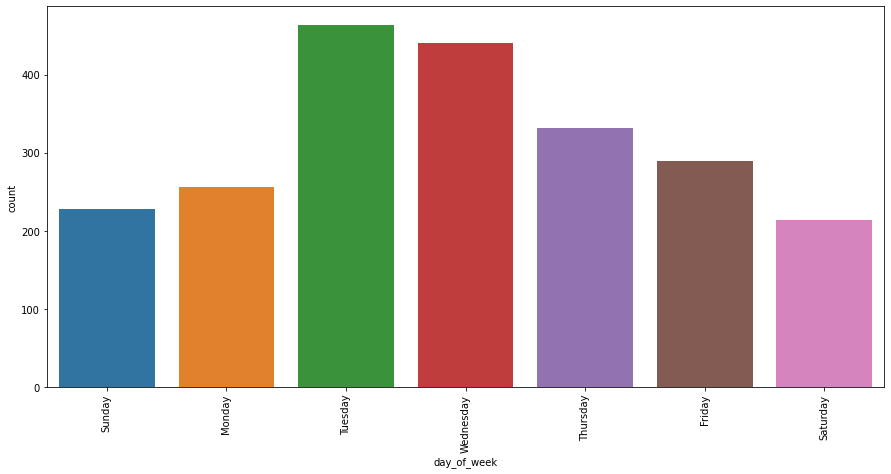

In [ ]:
#sort by weekday
dfv = dfv.sort_values(by = 'nday_of_week')
#Bar plot for number of complaints weekday
fig , ax = plt.subplots(figsize=(15,7))
plot = sns.countplot(dfv['day_of_week'])
ticks = plt.setp(plot.get_xticklabels(), rotation=90)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



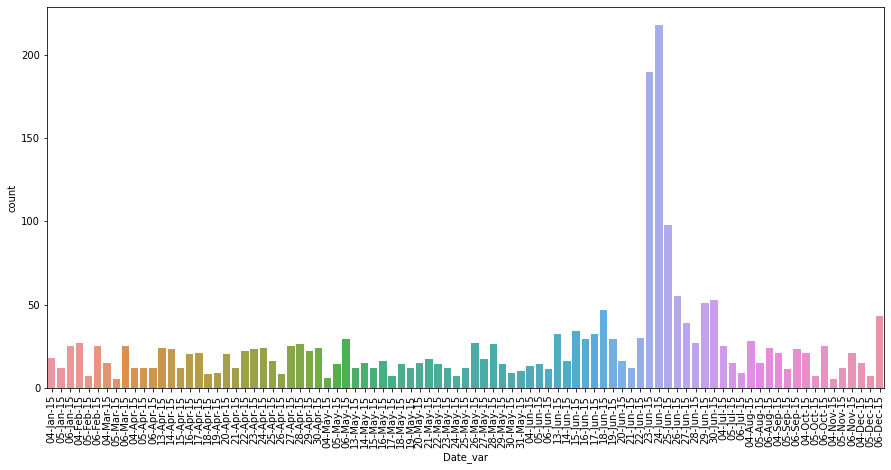

In [ ]:
#variable for just date in DD-MM-YY format without timestamp
dfv['Date_var'] = dfv['Date'].dt.strftime('%d-%b-%y')
#Sort by date
dfv = dfv.sort_values(by='Date')
#Bar plot for number of complaints by date
fig , ax = plt.subplots(figsize=(15,7))
plot = sns.countplot(dfv['Date_var'])
ticks = plt.setp(plot.get_xticklabels(), rotation=90)

In [ ]:
#State with maximum complaints
complaints_count_state = dfv.groupby(['State']).size().sort_values(ascending=False).to_frame().reset_index().rename({0: "Count"}, axis=1)
complaints_count_state.sort_values(by=['State'])

,State,Count
18,Alabama,26
20,Arizona,20
31,Arkansas,6
2,California,220
8,Colorado,80
26,Connecticut,12
27,Delaware,12
22,District Of Columbia,16
38,District of Columbia,1
1,Florida,240


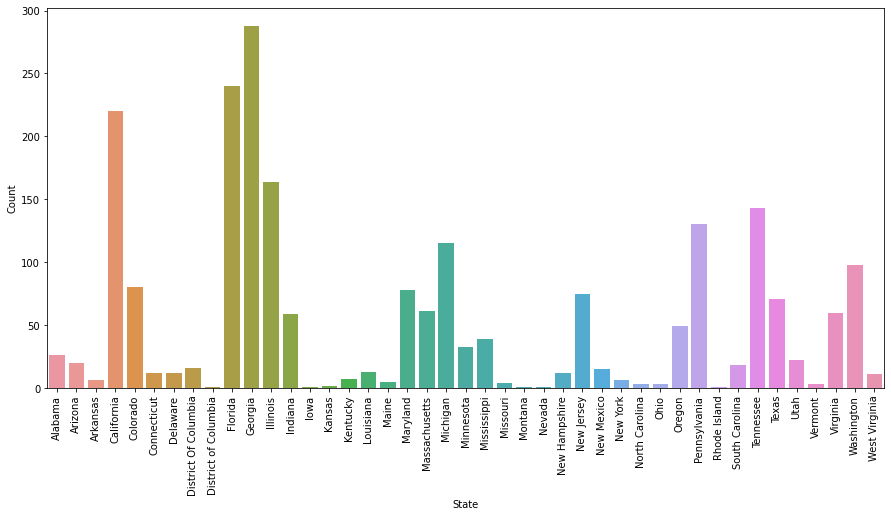

In [ ]:
#Bar plot for number of complaints by state
fig , ax = plt.subplots(figsize=(15,7))
plot = sns.barplot(x=complaints_count_state['State'],y=complaints_count_state['Count'],order=complaints_count_state.sort_values('State').State)
ticks = plt.setp(plot.get_xticklabels(), rotation=90)

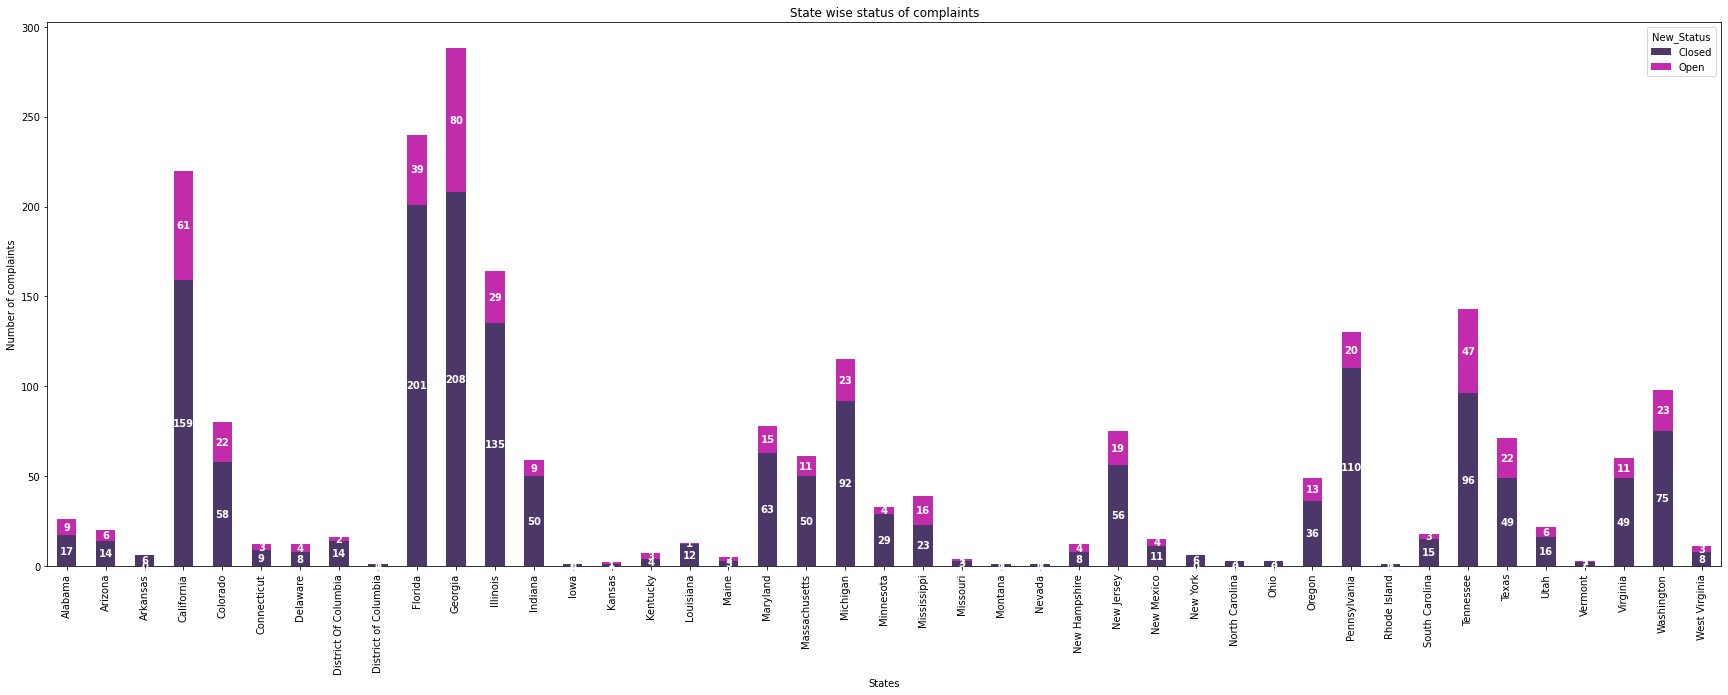

In [ ]:
#Create new column and catagorize status

dfv['New_Status'] = ['Closed' if Status == 'Closed' or Status == 'Solved' else 'Open' for Status in dfv['Status']]
# Create a df for state wise status

State_wise_status = dfv.groupby(['State','New_Status']).size().unstack(level=-1).fillna(0).astype(int)
# State wise complaint status using Stacked bar chart with pandas

sws = State_wise_status.plot(kind='bar', figsize = (30,10), color=['#4B3869','#C32BAD'],title  = 'State wise status of complaints', xlabel = 'States', ylabel = 'Number of complaints', stacked = True)
sws.tick_params(axis='x', labelrotation=90)
for p in sws.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    sws.text(x+width/2, y+height/2, '{:.0f}'.format(height), color="white", horizontalalignment='center', verticalalignment='center', fontweight='bold')

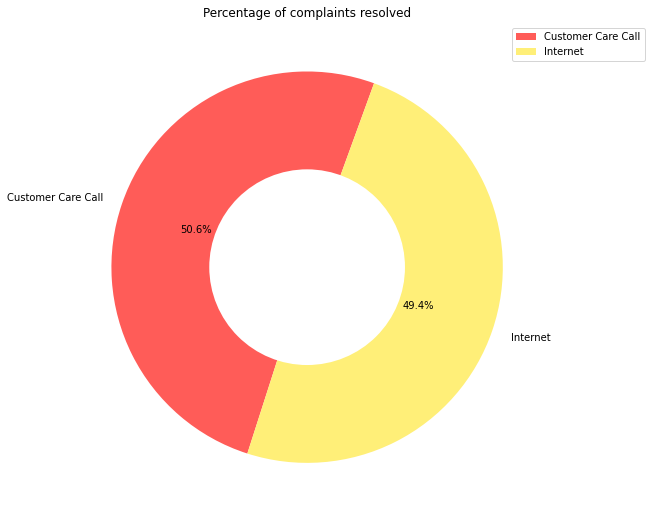

In [ ]:
# Complaints received through Internet and Customer Care call with resolved percentage

Complaints_resolved = dfv.groupby(['Received Via','New_Status']).size().unstack(level=-1)
Complaints_resolved['Resolved %'] = round((Complaints_resolved['Closed']/Complaints_resolved['Closed'].sum())*100,2)

# Pie Chart for the complaints received through Internet and Customer Care call with resolved percentage

colors = ['#FF5C58','#FFEF78']
labels = list(Complaints_resolved.index)
fig, ax1 = plt.subplots(figsize=(20,9))
fig.figsize=(20,10)
ax1.pie(Complaints_resolved['Closed'], colors = colors, labels=labels, autopct='%1.1f%%',startangle=70)
centre_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.legend(labels, bbox_to_anchor=(1.2,1),loc="upper right")
plt.title('Percentage of complaints resolved')
plt.show()

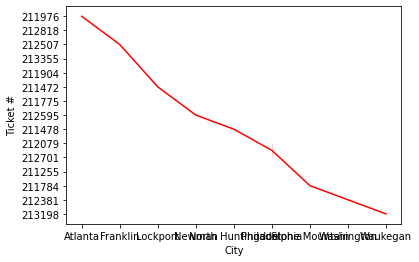

In [ ]:
sns.lineplot(x=dfv['City'].head(10),y=dfv['Ticket #'].head(15),color='red')

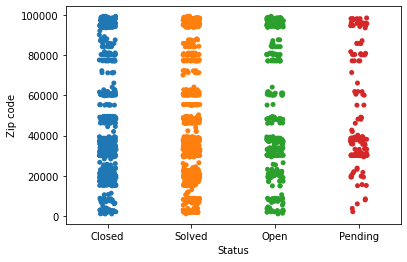

In [ ]:
sns.stripplot(x=dfv['Status'],y=dfv['Zip code'])

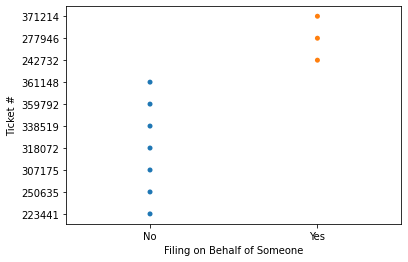

In [ ]:
sns.swarmplot(x=dfv['Filing on Behalf of Someone'],y=dfv['Ticket #'].head(10))

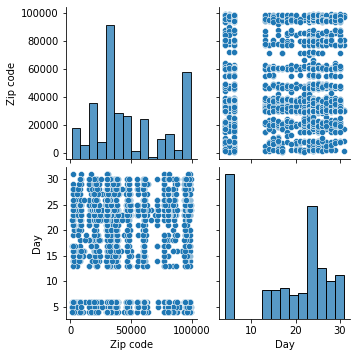

In [ ]:
sns.pairplot(dfv)

MODEL BUILDING

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import naive_bayes
from sklearn import neighbors

Selccting the features into x and target variable into Y.

In [ ]:
X = df.loc[:,['City', 'State', 'Zip code', 'Status']]
Y= df.loc[:, df.columns == 'Received Via' ]

Logistic Regression


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=70)

In [ ]:
model = LogisticRegression(random_state=7)
model.fit(X_train,y_train)#X_train is all the instance with attributes, y_train is the label of each instance

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



LogisticRegression(random_state=7)

In [ ]:
y_lgpred = model.predict(X_test)

In [ ]:
confusion_matrix(y_test,y_lgpred)

array([[174, 160],
       [180, 154]])

In [ ]:
acclrg = accuracy_score(y_test,y_lgpred)

In [ ]:
acclrg

0.49101796407185627

In [ ]:
tn,fn, fp, tp = confusion_matrix(y_test,y_lgpred).ravel()
print('true_negative : ', tn)
print('false_negative : ', fn)
print('false_poesitive : ', fp)
print('True_positive : ', tp)

true_negative :  174
false_negative :  160
false_poesitive :  180
True_positive :  154


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_lgpred))

              precision    recall  f1-score   support

           0       0.49      0.52      0.51       334
           1       0.49      0.46      0.48       334

    accuracy                           0.49       668
   macro avg       0.49      0.49      0.49       668
weighted avg       0.49      0.49      0.49       668



KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



KNeighborsClassifier(n_neighbors=7)

In [ ]:
knn.score(X_test,y_test)

0.5194610778443114

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[175, 159],
       [162, 172]])

In [ ]:
tn,fn, fp, tp = confusion_matrix(y_test,y_pred).ravel()
print('true_negative : ', tn)
print('false_negative : ', fn)
print('false_poesitive : ', fp)
print('True_positive : ', tp)

true_negative :  175
false_negative :  159
false_poesitive :  162
True_positive :  172


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.52      0.52      0.52       334
           1       0.52      0.51      0.52       334

    accuracy                           0.52       668
   macro avg       0.52      0.52      0.52       668
weighted avg       0.52      0.52      0.52       668



Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf1 = RandomForestClassifier(n_estimators=40)
rf1.fit(X_train,y_train)
pred = rf1.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.51      0.48      0.50       334
           1       0.51      0.54      0.53       334

    accuracy                           0.51       668
   macro avg       0.51      0.51      0.51       668
weighted avg       0.51      0.51      0.51       668



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



SVC

In [ ]:
from sklearn.svm import SVC
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train,y_train)
pred_svm = clf.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred_svm)

array([[120, 214],
       [133, 201]])

In [ ]:
print(accuracy_score(y_test, pred_svm))

0.4805389221556886


In [ ]:
tn,fn, fp, tp = confusion_matrix(y_test,pred_svm).ravel()
print('true_negative : ', tn)
print('false_negative : ', fn)
print('false_poesitive : ', fp)
print('True_positive : ', tp)

true_negative :  120
false_negative :  214
false_poesitive :  133
True_positive :  201


In [ ]:
print(classification_report(y_test,pred_svm))

              precision    recall  f1-score   support

           0       0.47      0.36      0.41       334
           1       0.48      0.60      0.54       334

    accuracy                           0.48       668
   macro avg       0.48      0.48      0.47       668
weighted avg       0.48      0.48      0.47       668



Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
nav_classifier = GaussianNB()
nav_classifier.fit(X_train, y_train)
pred_nav=nav_classifier.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred_nav)

array([[173, 161],
       [179, 155]])

In [ ]:
print(accuracy_score(y_test, pred_nav))

0.49101796407185627


In [ ]:
tn,fn, fp, tp = confusion_matrix(y_test,pred_nav).ravel()
print('true_negative : ', tn)
print('false_negative : ', fn)
print('false_poesitive : ', fp)
print('True_positive : ', tp)

true_negative :  173
false_negative :  161
false_poesitive :  179
True_positive :  155


In [ ]:
print(classification_report(y_test,pred_nav))

              precision    recall  f1-score   support

           0       0.49      0.52      0.50       334
           1       0.49      0.46      0.48       334

    accuracy                           0.49       668
   macro avg       0.49      0.49      0.49       668
weighted avg       0.49      0.49      0.49       668



Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier().fit(X_train, y_train)
pred_DT = DT.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred_DT)

array([[169, 165],
       [154, 180]])

In [ ]:
print(accuracy_score(y_test, pred_DT))

0.5224550898203593


In [ ]:
tn,fn, fp, tp = confusion_matrix(y_test,pred_DT).ravel()
print('true_negative : ', tn)
print('false_negative : ', fn)
print('false_poesitive : ', fp)
print('True_positive : ', tp)

true_negative :  169
false_negative :  165
false_poesitive :  154
True_positive :  180


In [ ]:
print(classification_report(y_test,pred_DT))

              precision    recall  f1-score   support

           0       0.52      0.51      0.51       334
           1       0.52      0.54      0.53       334

    accuracy                           0.52       668
   macro avg       0.52      0.52      0.52       668
weighted avg       0.52      0.52      0.52       668



SCORES COMPARISION

In [ ]:
models = pd.DataFrame({
    "Model": ["KNN","Logistic Regression","Random forest","Svm","Naive Bayes","Desion tree"],
    "Score": [ knn.score(X_test,y_test)*100,accuracy_score(y_test,pred)*100,accuracy_score(y_test,pred)*100,accuracy_score(y_test, pred_svm)*100,accuracy_score(y_test, pred_nav)*100,accuracy_score(y_test, pred_DT)*100]
})

In [ ]:
models.sort_values(by = "Score", ascending = False)

,Model,Score
5,Desion tree,52.245509
0,KNN,51.946108
1,Logistic Regression,51.347305
2,Random forest,51.347305
4,Naive Bayes,49.101796
3,Svm,48.053892


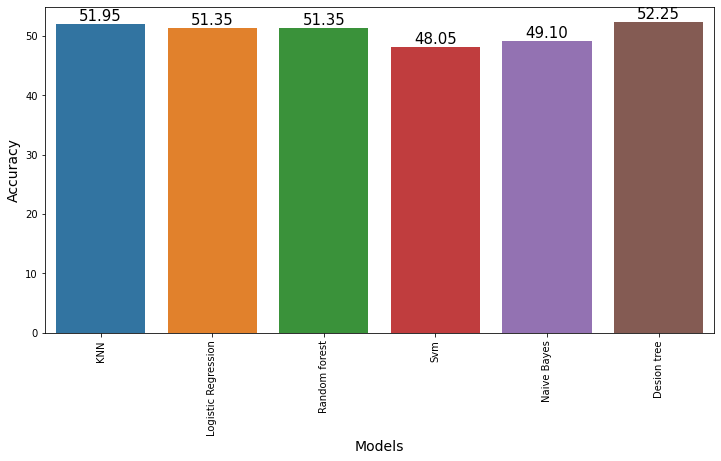

In [ ]:
output = pd.DataFrame({"Model":["KNN","Logistic Regression","Random forest","Svm","Naive Bayes","Desion tree"],"Score": [ knn.score(X_test,y_test)*100,accuracy_score(y_test,pred)*100,accuracy_score(y_test,pred)*100,accuracy_score(y_test, pred_svm)*100,accuracy_score(y_test, pred_nav)*100,accuracy_score(y_test, pred_DT)*100]})
plt.figure(figsize=(12,6))
plots = sns.barplot(x='Model',y='Score',data=output)
for bar in plots.patches:
    plots.annotate(format(bar.get_height(),'.2f'),
                   (bar.get_x()+bar.get_width()/2,
                   bar.get_height()),ha='center',va='center',
                   size=15,xytext=(0,8),
                   textcoords='offset points')
plt.xlabel("Models", size=14)
plt.xticks(rotation=90);
plt.ylabel("Accuracy",size=14)
plt.show()